In [1]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn as sk
import sklearn.datasets
from sklearn.model_selection import train_test_split


In [2]:
datasetn=pd.read_csv(r"C:\FINAL YEAR PROJECT\dataset\new_data.csv")

In [3]:
numerics=LabelEncoder()

In [4]:
dataset['Sex_n']=numerics.fit_transform(dataset['Sex'])
dataset['ChestPainType_n']=numerics.fit_transform(dataset['ChestPainType'])
dataset['RestingECG_n']=numerics.fit_transform(dataset['RestingECG'])
dataset['ExerciseAngina_n']=numerics.fit_transform(dataset['ExerciseAngina'])
dataset['ST_Slope_n']=numerics.fit_transform(dataset['ST_Slope'])

In [5]:
datasetn=dataset.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis='columns')


In [6]:
datasetn=datasetn.iloc[:,1:]

In [7]:
datasetn

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_n,ChestPainType_n,RestingECG_n,ExerciseAngina_n,ST_Slope_n
0,40,140,289.0,0,172,0.0,0,1,1,1,0,2
1,49,160,180.0,0,156,1.0,1,0,2,1,0,1
2,37,130,283.0,0,98,0.0,0,1,1,2,0,2
3,48,138,214.0,0,108,1.5,1,0,0,1,1,1
4,54,150,195.0,0,122,0.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
854,45,110,264.0,0,132,1.2,1,1,3,1,0,1
855,68,144,193.0,1,141,3.4,1,1,0,1,0,1
856,57,130,131.0,0,115,1.2,1,1,0,1,1,1
857,57,130,236.0,0,174,0.0,1,0,1,0,0,1


In [8]:
dataframe=pd.DataFrame(datasetn,columns=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease','Sex_n','ChestPainType_n','RestingECG_n','ExerciseAngina_n','ST_Slope_n'])

In [9]:
dataframe.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_n,ChestPainType_n,RestingECG_n,ExerciseAngina_n,ST_Slope_n
0,40,140,289.0,0,172,0.0,0,1,1,1,0,2
1,49,160,180.0,0,156,1.0,1,0,2,1,0,1
2,37,130,283.0,0,98,0.0,0,1,1,2,0,2
3,48,138,214.0,0,108,1.5,1,0,0,1,1,1
4,54,150,195.0,0,122,0.0,0,1,2,1,0,2


In [10]:
dataframe['label'] = datasetn.HeartDisease

In [11]:
dataframe.tail()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_n,ChestPainType_n,RestingECG_n,ExerciseAngina_n,ST_Slope_n,label
854,45,110,264.0,0,132,1.2,1,1,3,1,0,1,1
855,68,144,193.0,1,141,3.4,1,1,0,1,0,1,1
856,57,130,131.0,0,115,1.2,1,1,0,1,1,1,1
857,57,130,236.0,0,174,0.0,1,0,1,0,0,1,1
858,38,138,175.0,0,173,0.0,0,1,2,1,0,2,0


In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               859 non-null    int64  
 1   RestingBP         859 non-null    int64  
 2   Cholesterol       859 non-null    float64
 3   FastingBS         859 non-null    int64  
 4   MaxHR             859 non-null    int64  
 5   Oldpeak           859 non-null    float64
 6   HeartDisease      859 non-null    int64  
 7   Sex_n             859 non-null    int32  
 8   ChestPainType_n   859 non-null    int32  
 9   RestingECG_n      859 non-null    int32  
 10  ExerciseAngina_n  859 non-null    int32  
 11  ST_Slope_n        859 non-null    int32  
 12  label             859 non-null    int64  
dtypes: float64(2), int32(5), int64(6)
memory usage: 70.6 KB


In [13]:
dataframe.isnull().sum()

Age                 0
RestingBP           0
Cholesterol         0
FastingBS           0
MaxHR               0
Oldpeak             0
HeartDisease        0
Sex_n               0
ChestPainType_n     0
RestingECG_n        0
ExerciseAngina_n    0
ST_Slope_n          0
label               0
dtype: int64

# distribution of Target Varibale

In [14]:
dataframe['label'].value_counts()

1    465
0    394
Name: label, dtype: int64

# Separating the features and target

In [16]:
X = dataframe.drop(columns='label', axis=1)
Y = dataframe['label']

In [17]:
print(X)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140        289.0          0    172      0.0             0   
1     49        160        180.0          0    156      1.0             1   
2     37        130        283.0          0     98      0.0             0   
3     48        138        214.0          0    108      1.5             1   
4     54        150        195.0          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
854   45        110        264.0          0    132      1.2             1   
855   68        144        193.0          1    141      3.4             1   
856   57        130        131.0          0    115      1.2             1   
857   57        130        236.0          0    174      0.0             1   
858   38        138        175.0          0    173      0.0             0   

     Sex_n  ChestPainType_n  RestingECG_n  ExerciseAngina_n  ST_Slope_n  
0

In [18]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
854    1
855    1
856    1
857    1
858    0
Name: label, Length: 859, dtype: int64


# Splitting the data into training data & Testing data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(859, 12) (687, 12) (172, 12)


# standardize data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

# neural network

In [23]:
# importing tensorflow and Keras
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

In [24]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(12,)),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [25]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=30)

Epoch 1/30
20/20 [==============================] - 1s 16ms/step - loss: 0.7600 - accuracy: 0.4854 - val_loss: 0.6805 - val_accuracy: 0.5362
Epoch 2/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.5793 - val_loss: 0.6067 - val_accuracy: 0.6522
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 0.6058 - accuracy: 0.6650 - val_loss: 0.5452 - val_accuracy: 0.7681
Epoch 4/30
20/20 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.7362 - val_loss: 0.4956 - val_accuracy: 0.7971
Epoch 5/30
20/20 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.7994 - val_loss: 0.4544 - val_accuracy: 0.8696
Epoch 6/30
20/20 [==============================] - 0s 3ms/step - loss: 0.4556 - accuracy: 0.8608 - val_loss: 0.4154 - val_accuracy: 0.8841
Epoch 7/30
20/20 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8803 - val_loss: 0.3798 - val_accuracy: 0.8986
Epoch 8/30
20/20 [=

In [27]:
datasetn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               859 non-null    int64  
 1   RestingBP         859 non-null    int64  
 2   Cholesterol       859 non-null    float64
 3   FastingBS         859 non-null    int64  
 4   MaxHR             859 non-null    int64  
 5   Oldpeak           859 non-null    float64
 6   HeartDisease      859 non-null    int64  
 7   Sex_n             859 non-null    int32  
 8   ChestPainType_n   859 non-null    int32  
 9   RestingECG_n      859 non-null    int32  
 10  ExerciseAngina_n  859 non-null    int32  
 11  ST_Slope_n        859 non-null    int32  
dtypes: float64(2), int32(5), int64(5)
memory usage: 63.9 KB


# Visualizing accuracy and loss

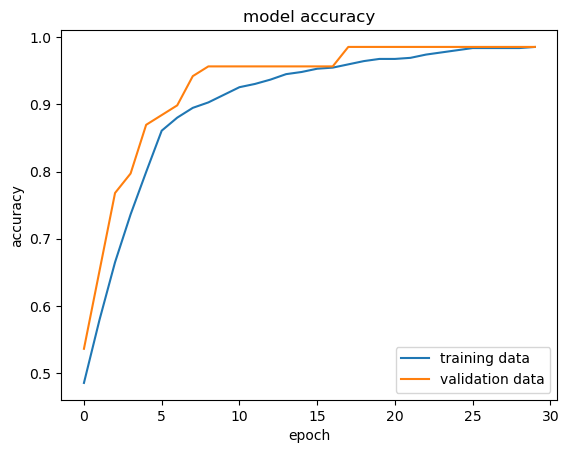

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

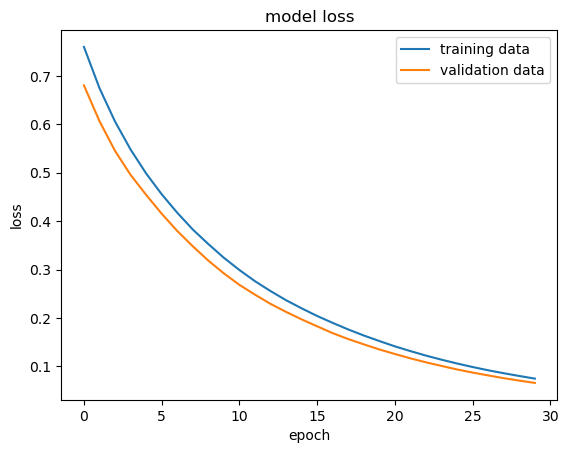

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

# Accuracy of the model on test data

In [30]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9884
0.9883720874786377


In [31]:
print(X_test_std.shape)
print(X_test_std[0])

(172, 12)
[ 0.06495872 -0.40745808 -0.36092341 -0.54875893  0.10629394 -0.85056091
  0.93377439  0.49453536 -0.85190946 -0.01158874 -0.80958118 -0.6261767 ]


In [32]:
Y_pred = model.predict(X_test_std)

6/6 [==============================] - 0s 3ms/step


In [33]:
print(Y_pred.shape)
print(Y_pred[0])

(172, 2)
[0.15525952 0.76306283]


In [34]:
print(X_test_std)

[[ 0.06495872 -0.40745808 -0.36092341 ... -0.01158874 -0.80958118
  -0.6261767 ]
 [-1.10105795  0.48610556 -0.75076672 ...  1.58070389  1.23520658
   1.0412008 ]
 [ 1.12497387 -1.30102173 -0.75076672 ... -0.01158874  1.23520658
  -2.29355421]
 ...
 [ 0.91297084  1.55838193 -0.49864769 ... -0.01158874  1.23520658
  -2.29355421]
 [ 0.06495872 -0.70531263 -0.03956677 ... -0.01158874 -0.80958118
   1.0412008 ]
 [-1.52506401 -0.82445445 -0.29206128 ... -0.01158874 -0.80958118
  -0.6261767 ]]


In [35]:
print(Y_pred)

[[0.15525952 0.76306283]
 [0.08779035 0.82469213]
 [0.01946664 0.9018791 ]
 [0.9536609  0.4341857 ]
 [0.9249221  0.52232057]
 [0.7199051  0.28678426]
 [0.952008   0.48160604]
 [0.06728949 0.897927  ]
 [0.47439826 0.87683225]
 [0.95346177 0.48233804]
 [0.8871229  0.44240683]
 [0.9948078  0.5330351 ]
 [0.48563415 0.2065383 ]
 [0.9904064  0.5477719 ]
 [0.84009093 0.28386205]
 [0.14074035 0.9154258 ]
 [0.10946797 0.81629854]
 [0.9529628  0.64877045]
 [0.62274337 0.2983721 ]
 [0.20128456 0.11441664]
 [0.9241496  0.470566  ]
 [0.1419994  0.7594075 ]
 [0.3416314  0.7848468 ]
 [0.9566143  0.35498863]
 [0.9749728  0.5292249 ]
 [0.01847637 0.9126389 ]
 [0.97193456 0.49978963]
 [0.99223864 0.6002686 ]
 [0.30759338 0.3642517 ]
 [0.839827   0.4515426 ]
 [0.07162477 0.84852064]
 [0.81680435 0.92142177]
 [0.6760043  0.34817398]
 [0.04319084 0.92048466]
 [0.9820831  0.5046721 ]
 [0.05301809 0.8070129 ]
 [0.5412556  0.37154707]
 [0.9198902  0.46922567]
 [0.0654356  0.9099355 ]
 [0.1467131  0.8660818 ]


# model.predict() gives the prediction probability of each class for that data point

In [36]:
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = nm.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [37]:
# converting the prediction probability to class labels

Y_pred_labels = [nm.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]


In [42]:
input_data=(1,1,1,1,1,1,1,1,1,1,1,1)

# change the input_data to a numpy array
input_data_as_numpy_array = nm.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [nm.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('patient does not have heart disease')

else:
  print('patient has heart disease')

1/1 [==============================] - 0s 25ms/step
[[0.03954261 0.9663837 ]]
[1]
patient has heart disease


C:\Users\sayuj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
dataframe.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_n,ChestPainType_n,RestingECG_n,ExerciseAngina_n,ST_Slope_n,label
0,40,140,289.0,0,172,0.0,0,1,1,1,0,2,0
1,49,160,180.0,0,156,1.0,1,0,2,1,0,1,1
2,37,130,283.0,0,98,0.0,0,1,1,2,0,2,0
3,48,138,214.0,0,108,1.5,1,0,0,1,1,1,1
4,54,150,195.0,0,122,0.0,0,1,2,1,0,2,0


In [40]:
dataframe.to_csv(r"C:\FINAL YEAR PROJECT\dataset\dataframe\dataframe1.csv")


In [41]:
redataframe = dataframe[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','Sex_n','ChestPainType_n','RestingECG_n','ExerciseAngina_n','ST_Slope_n','label','HeartDisease']]

In [42]:
redataframe.to_csv(r"C:\FINAL YEAR PROJECT\dataset\dataframe\dataframe2.csv")